October 13, 2020

Code by Jordan Lanius.

#Activity Recognition Project Phase II

##Dataset

###Upload Data

In [ ]:
from google.colab import files

# Input dataset 'ElderlyActivityDataBed.csv
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import numpy as np

# Only data that will be used as input/output
data = pd.read_csv('ElderlyActivityDataBed.csv', delimiter=',', usecols=(1, 3, 4, 5, 6, 7, 8, 9, 10))
columnNames = list(data.columns)
# Only values to numpy array
dataset = np.genfromtxt('ElderlyActivityDataBed.csv', delimiter=",", skip_header=True, usecols=(1, 3, 4, 5, 6, 7, 8, 9, 10))

# Get shape of dataset
print(dataset.shape)

(52482, 9)


In [ ]:
# Preview the data
print(columnNames)
print(dataset[:5])

['Gender', 'FrontalAcceleration', 'VerticalAcceleration', 'LateralAcceleration', 'AntennaID', 'RSSI', 'Phase', 'Frequency', 'Activity']
[[ 0.0000e+00  2.7203e-01  1.0082e+00 -8.2102e-02  1.0000e+00 -6.3500e+01
   2.4252e+00  9.2425e+02  0.0000e+00]
 [ 0.0000e+00  2.7203e-01  1.0082e+00 -8.2102e-02  1.0000e+00 -6.3000e+01
   4.7369e+00  9.2175e+02  0.0000e+00]
 [ 0.0000e+00  4.4791e-01  9.1636e-01 -1.3684e-02  1.0000e+00 -6.3500e+01
   3.0311e+00  9.2375e+02  0.0000e+00]
 [ 0.0000e+00  4.4791e-01  9.1636e-01 -1.3684e-02  1.0000e+00 -6.3000e+01
   2.0371e+00  9.2125e+02  0.0000e+00]
 [ 0.0000e+00  3.4238e-01  9.6229e-01 -5.9296e-02  1.0000e+00 -6.3500e+01
   5.8920e+00  9.2025e+02  0.0000e+00]]


###Clean Data

In [ ]:
# Get dataset information
print(np.isnan(dataset))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
# Clear any empty entries
dataset = dataset[~np.isnan(dataset).any(axis=1)]
print(dataset.shape)

(52482, 9)


###Data Analysis

In [ ]:
# Create a dataframe
datasetFrame = pd.DataFrame(data = dataset, columns = columnNames)

In [ ]:
# Find ratio of output
datasetFrame['Activity'].value_counts()

0.0    46145
1.0     6337
Name: Activity, dtype: int64

In [ ]:
# Find distributions of input features
datasetFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,52482.0,0.479993,0.499604,0.00000,0.000000,0.000000,1.000000,1.0000
FrontalAcceleration,52482.0,0.805042,0.396362,-0.74808,0.424460,0.952100,1.128000,1.5032
VerticalAcceleration,52482.0,0.377804,0.468899,-0.55349,-0.025263,0.135500,0.916360,2.0302
LateralAcceleration,52482.0,0.007710,0.180674,-0.48121,-0.093505,-0.025087,0.066138,1.2178
AntennaID,52482.0,2.360752,1.261542,1.00000,1.000000,3.000000,4.000000,4.0000
RSSI,52482.0,-58.430814,4.611220,-70.00000,-61.500000,-57.500000,-56.500000,-38.5000
Phase,52482.0,3.275907,2.240341,0.00000,0.951070,4.072700,5.425700,6.2817
Frequency,52482.0,922.762261,1.693769,920.25000,921.250000,922.750000,924.250000,925.7500
Activity,52482.0,0.120746,0.325835,0.00000,0.000000,0.000000,0.000000,1.0000


In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
datasetFrame = shuffle(datasetFrame)
datasetFrame.head()

,Gender,FrontalAcceleration,VerticalAcceleration,LateralAcceleration,AntennaID,RSSI,Phase,Frequency,Activity
41752,1.0,1.257000,-0.036746,-0.025087,1.0,-56.0,4.29360,923.25,0.0
36787,1.0,1.022500,0.192920,-0.002281,3.0,-57.0,6.17730,925.75,0.0
33411,1.0,0.424460,0.870420,0.191570,1.0,-59.5,4.53600,922.75,0.0
19144,0.0,0.049247,0.985260,0.066138,4.0,-57.0,5.33980,923.25,0.0
27231,0.0,0.236850,0.985260,0.077541,1.0,-59.5,0.73631,923.75,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7bbbd9dd8>]],
      dtype=object)

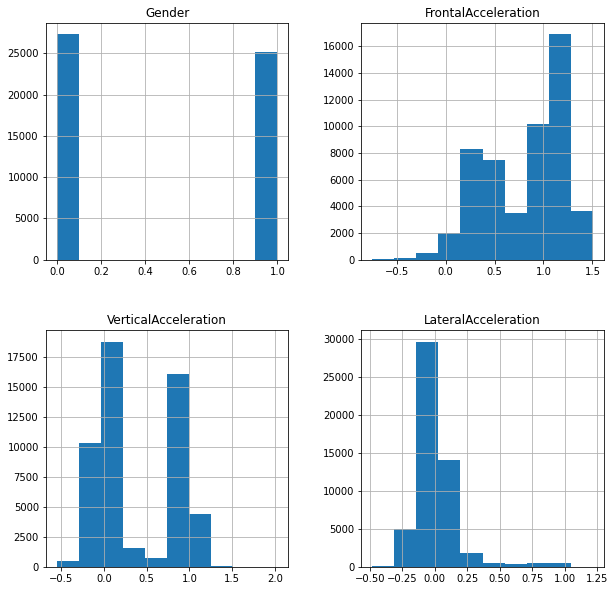

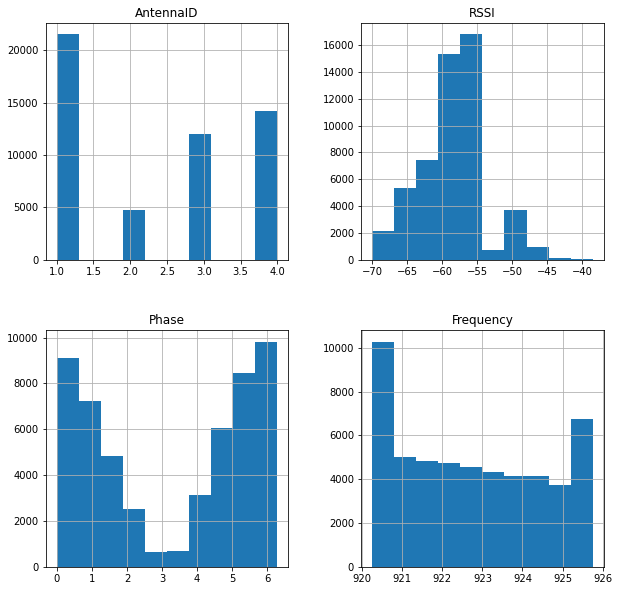

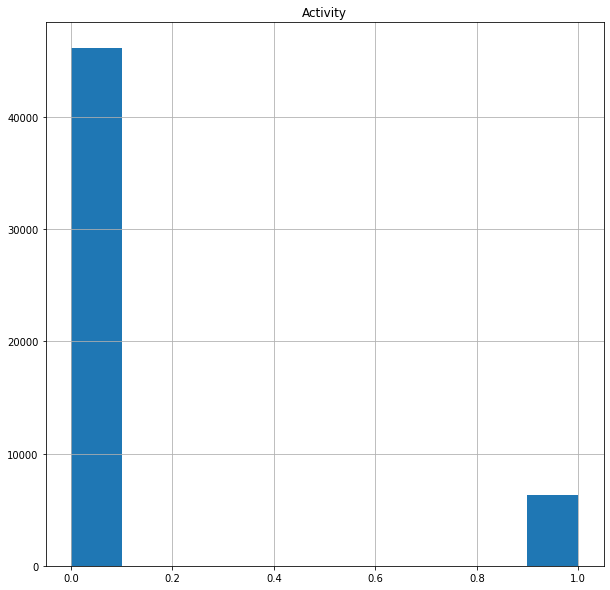

In [ ]:
# Get histograms of input and output columns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = ((10,10))
datasetFrame.hist(column=['Gender', 'FrontalAcceleration', 'VerticalAcceleration', 'LateralAcceleration'], layout=(2,2))
datasetFrame.hist(column=['AntennaID', 'RSSI', 'Phase', 'Frequency'])
datasetFrame.hist(column=['Activity'])

##Data Processing

###Data Splitting

In [ ]:
# Shuffle the dataset
import random
np.random.shuffle(dataset)

In [ ]:
# Split into training and validation
index_percent = int (0.3 * len(dataset[:,0])) # 30%
print(index_percent)
XTRAIN = np.copy(dataset[index_percent:, 0:-1])
YTRAIN = np.copy(dataset[index_percent:, -1])
OUTTRAIN = np.copy(dataset[index_percent:, :])
XVALID = np.copy(dataset[:index_percent, 0:-1])
YVALID = np.copy(dataset[:index_percent, -1])
OUTVALID = np.copy(dataset[:index_percent, :])

15744


###Data Normalization

In [ ]:
# Isolate input from output
Input = np.copy(dataset[:, 0:-1])
print(Input[0:5])

[[ 1.0000e+00  4.0101e-01  9.6229e-01 -7.0699e-02  4.0000e+00 -5.6000e+01
   6.0163e+00  9.2125e+02]
 [ 1.0000e+00  1.1983e+00  9.1865e-03 -4.7893e-02  4.0000e+00 -6.2000e+01
   9.5107e-01  9.2125e+02]
 [ 0.0000e+00  1.0576e+00  2.0670e-02 -1.5052e-01  3.0000e+00 -6.1500e+01
   6.1114e+00  9.2225e+02]
 [ 1.0000e+00  1.0225e+00  8.9569e-02 -1.7333e-01  1.0000e+00 -5.7000e+01
   6.2540e+00  9.2425e+02]
 [ 0.0000e+00  1.1632e+00 -5.9712e-02 -9.3505e-02  3.0000e+00 -5.9500e+01
   6.1037e+00  9.2275e+02]]


In [ ]:
# Find mean and standard deviation of input
xMean = Input.mean(axis=0)
Input -= xMean
xStd = Input.std(axis=0)
Input /= xStd

In [ ]:
# Define functions to quickly normalize and revert data
def normalize(arr):
    return (arr - xMean) / xStd

def undoNormalize(arr):
    return (arr * xStd) + xMean

In [ ]:
# Normalize training and validation data
XTRAIN = normalize(XTRAIN)
XVALID = normalize(XVALID)
print(XTRAIN)
print(XVALID)

[[-0.96075572 -1.31517893  1.07509467 ...  0.31029273 -1.01101913
  -1.18804872]
 [ 1.0408473  -1.31517893  1.36895598 ... -0.44873275  1.05614081
   1.17357041]
 [ 1.0408473   0.78529404 -0.71267144 ... -0.12343611  0.76377188
  -0.59764394]
 ...
 [-0.96075572  0.4301861  -0.68818193 ...  0.41872494  0.90071659
   0.87836802]
 [-0.96075572  0.66696678 -0.73716095 ...  0.52715716  0.73225852
  -1.18804872]
 [ 1.0408473   0.34145326 -0.4188016  ...  1.82834369 -1.43691497
  -0.30244155]]
[[ 1.0408473  -1.01936077  1.2465191  ...  0.52715716  1.22321515
  -0.89284633]
 [ 1.0408473   0.99217754 -0.78614103 ... -0.77402938 -1.03772514
  -0.89284633]
 [-0.96075572  0.63719574 -0.76165046 ... -0.66559717  1.26566444
  -0.30244155]
 ...
 [ 1.0408473   0.72600426 -0.66369242 ... -0.66559717  0.81648756
   0.28796323]
 [-0.96075572  0.87385027 -1.12900375 ...  1.71991148  0.06878191
   0.28796323]
 [ 1.0408473  -0.98979156 -1.42288638 ...  0.09342831 -0.95281317
  -1.18804872]]


##Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

###Logistic Regression

####Basic Model

In [ ]:
logBasicModel = Sequential()
logBasicModel.add(Dense(1, input_dim = len(XTRAIN[0,:]), activation='sigmoid'))
logBasicModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
logBasicModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
logBasicHist = logBasicModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.1813 - mse: 0.1813 - acc: 0.7351 - val_loss: 0.1088 - val_mse: 0.1088 - val_acc: 0.8855
Epoch 2/128
1149/1149 [==============================] - 1s 1ms/step - loss: 0.0948 - mse: 0.0948 - acc: 0.8842 - val_loss: 0.0874 - val_mse: 0.0874 - val_acc: 0.8892
Epoch 3/128
1149/1149 [==============================] - 1s 1ms/step - loss: 0.0856 - mse: 0.0856 - acc: 0.8927 - val_loss: 0.0835 - val_mse: 0.0835 - val_acc: 0.8955
Epoch 4/128
1149/1149 [==============================] - 1s 1ms/step - loss: 0.0827 - mse: 0.0827 - acc: 0.8961 - val_loss: 0.0814 - val_mse: 0.0814 - val_acc: 0.8963
Epoch 5/128
1149/1149 [==============================] - 1s 1ms/step - loss: 0.0809 - mse: 0.0809 - acc: 0.8966 - val_loss: 0.0800 - val_mse: 0.0800 - val_acc: 0.8963
Epoch 6/128
1149/1149 [==============================] - 1s 1ms/step - loss: 0.0796 - mse: 0.0796 - acc: 0.8967 - val_loss: 0.0789 - val_mse: 0.0789 - val_acc: 0.896

####Multi-Layered Model

In [ ]:
logRelDuoModel = Sequential()
logRelDuoModel.add(Dense(4, input_dim = len(XTRAIN[0,:]), activation='relu'))
logRelDuoModel.add(Dense(1, activation='sigmoid'))
logRelDuoModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
logRelDuoModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
logRelDuoHist = logRelDuoModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0955 - mse: 0.0955 - acc: 0.8787 - val_loss: 0.0790 - val_mse: 0.0790 - val_acc: 0.8805
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0674 - mse: 0.0674 - acc: 0.8921 - val_loss: 0.0538 - val_mse: 0.0538 - val_acc: 0.9329
Epoch 3/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0449 - mse: 0.0449 - acc: 0.9633 - val_loss: 0.0366 - val_mse: 0.0366 - val_acc: 0.9708
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0342 - mse: 0.0342 - acc: 0.9679 - val_loss: 0.0307 - val_mse: 0.0307 - val_acc: 0.9698
Epoch 5/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0308 - mse: 0.0308 - acc: 0.9679 - val_loss: 0.0288 - val_mse: 0.0288 - val_acc: 0.9698
Epoch 6/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0293 - mse: 0.0293 - acc: 0.9679 - val_loss: 0.0274 - val_mse: 0.0274 - val_acc: 0.969

In [ ]:
logDuoModel = Sequential()
logDuoModel.add(Dense(4, input_dim = len(XTRAIN[0,:]), activation='sigmoid'))
logDuoModel.add(Dense(1, activation='sigmoid'))
logDuoModel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
logDuoModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
logDuoHist = logDuoModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.1433 - mse: 0.1433 - acc: 0.8027 - val_loss: 0.0925 - val_mse: 0.0925 - val_acc: 0.8805
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0886 - mse: 0.0886 - acc: 0.8788 - val_loss: 0.0843 - val_mse: 0.0843 - val_acc: 0.8807
Epoch 3/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0816 - mse: 0.0816 - acc: 0.8885 - val_loss: 0.0783 - val_mse: 0.0783 - val_acc: 0.8952
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0751 - mse: 0.0751 - acc: 0.8971 - val_loss: 0.0714 - val_mse: 0.0714 - val_acc: 0.8982
Epoch 5/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0669 - mse: 0.0669 - acc: 0.9089 - val_loss: 0.0622 - val_mse: 0.0622 - val_acc: 0.9174
Epoch 6/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0573 - mse: 0.0573 - acc: 0.9356 - val_loss: 0.0526 - val_mse: 0.0526 - val_acc: 0.944

In [ ]:
logRelTrioModel = Sequential()
logRelTrioModel.add(Dense(8, input_dim = len(XTRAIN[0,:]), activation='relu'))
logRelTrioModel.add(Dense(4, activation='relu'))
logRelTrioModel.add(Dense(1, activation='sigmoid'))
logRelTrioModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
logRelTrioModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
logRelTrioHist = logRelTrioModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0813 - mse: 0.0813 - acc: 0.9018 - val_loss: 0.0461 - val_mse: 0.0461 - val_acc: 0.9519
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0324 - mse: 0.0324 - acc: 0.9666 - val_loss: 0.0230 - val_mse: 0.0230 - val_acc: 0.9761
Epoch 3/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0206 - mse: 0.0206 - acc: 0.9791 - val_loss: 0.0185 - val_mse: 0.0185 - val_acc: 0.9816
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0182 - mse: 0.0182 - acc: 0.9813 - val_loss: 0.0175 - val_mse: 0.0175 - val_acc: 0.9816
Epoch 5/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0174 - mse: 0.0174 - acc: 0.9818 - val_loss: 0.0171 - val_mse: 0.0171 - val_acc: 0.9823
Epoch 6/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0171 - mse: 0.0171 - acc: 0.9819 - val_loss: 0.0169 - val_mse: 0.0169 - val_acc: 0.982

In [ ]:
logTrioModel = Sequential()
logTrioModel.add(Dense(8, input_dim = len(XTRAIN[0,:]), activation='sigmoid'))
logTrioModel.add(Dense(4, activation='sigmoid'))
logTrioModel.add(Dense(1, activation='sigmoid'))
logTrioModel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
logTrioModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
logTrioHist = logTrioModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 2ms/step - loss: 0.1437 - mse: 0.1437 - acc: 0.7976 - val_loss: 0.0955 - val_mse: 0.0955 - val_acc: 0.8805
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0898 - mse: 0.0898 - acc: 0.8787 - val_loss: 0.0829 - val_mse: 0.0829 - val_acc: 0.8805
Epoch 3/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0748 - mse: 0.0748 - acc: 0.8961 - val_loss: 0.0647 - val_mse: 0.0647 - val_acc: 0.9094
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0550 - mse: 0.0550 - acc: 0.9368 - val_loss: 0.0461 - val_mse: 0.0461 - val_acc: 0.9515
Epoch 5/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0415 - mse: 0.0415 - acc: 0.9569 - val_loss: 0.0366 - val_mse: 0.0366 - val_acc: 0.9629
Epoch 6/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0341 - mse: 0.0341 - acc: 0.9657 - val_loss: 0.0309 - val_mse: 0.0309 - val_acc: 0.970

In [ ]:
logRelQuadModel = Sequential()
logRelQuadModel.add(Dense(16, input_dim = len(XTRAIN[0,:]), activation='relu'))
logRelQuadModel.add(Dense(8, activation='relu'))
logRelQuadModel.add(Dense(4, activation='relu'))
logRelQuadModel.add(Dense(1, activation='sigmoid'))
logRelQuadModel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
logRelQuadModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
logRelQuadHist = logRelQuadModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0756 - mse: 0.0756 - acc: 0.9077 - val_loss: 0.0441 - val_mse: 0.0441 - val_acc: 0.9529
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0305 - mse: 0.0305 - acc: 0.9736 - val_loss: 0.0225 - val_mse: 0.0225 - val_acc: 0.9799
Epoch 3/128
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0198 - mse: 0.0198 - acc: 0.9814 - val_loss: 0.0179 - val_mse: 0.0179 - val_acc: 0.9823
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0173 - mse: 0.0173 - acc: 0.9821 - val_loss: 0.0164 - val_mse: 0.0164 - val_acc: 0.9825
Epoch 5/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0165 - mse: 0.0165 - acc: 0.9826 - val_loss: 0.0161 - val_mse: 0.0161 - val_acc: 0.9820
Epoch 6/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0161 - mse: 0.0161 - acc: 0.9824 - val_loss: 0.0207 - val_mse: 0.0207 - val_acc: 0.975

In [ ]:
logQuadModel = Sequential()
logQuadModel.add(Dense(16, input_dim = len(XTRAIN[0,:]), activation='sigmoid'))
logQuadModel.add(Dense(8, activation='sigmoid'))
logQuadModel.add(Dense(4, activation='sigmoid'))
logQuadModel.add(Dense(1, activation='sigmoid'))
logQuadModel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 5         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
logQuadModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
logQuadHist = logQuadModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0999 - mse: 0.0999 - acc: 0.8787 - val_loss: 0.0878 - val_mse: 0.0878 - val_acc: 0.8805
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0831 - mse: 0.0831 - acc: 0.8794 - val_loss: 0.0752 - val_mse: 0.0752 - val_acc: 0.8933
Epoch 3/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0605 - mse: 0.0605 - acc: 0.9236 - val_loss: 0.0457 - val_mse: 0.0457 - val_acc: 0.9544
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0400 - mse: 0.0400 - acc: 0.9584 - val_loss: 0.0347 - val_mse: 0.0347 - val_acc: 0.9644
Epoch 5/128
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0314 - mse: 0.0314 - acc: 0.9678 - val_loss: 0.0244 - val_mse: 0.0244 - val_acc: 0.9714
Epoch 6/128
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0211 - mse: 0.0211 - acc: 0.9783 - val_loss: 0.0182 - val_mse: 0.0182 - val_acc: 0.981

###Linear Regression

####Basic Model

In [ ]:
linBasicModel = Sequential()
linBasicModel.add(Dense(1, input_dim = len(XTRAIN[0,:]), activation='linear'))
linBasicModel.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
linBasicModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
linBasicHist = linBasicModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.2868 - mse: 0.2868 - acc: 0.8024 - val_loss: 0.0876 - val_mse: 0.0876 - val_acc: 0.8805
Epoch 2/128
1149/1149 [==============================] - 1s 1ms/step - loss: 0.0862 - mse: 0.0862 - acc: 0.8789 - val_loss: 0.0846 - val_mse: 0.0846 - val_acc: 0.8805
Epoch 3/128
1149/1149 [==============================] - 1s 1ms/step - loss: 0.0853 - mse: 0.0853 - acc: 0.8793 - val_loss: 0.0846 - val_mse: 0.0846 - val_acc: 0.8812
Epoch 4/128
1149/1149 [==============================] - 1s 1ms/step - loss: 0.0853 - mse: 0.0853 - acc: 0.8793 - val_loss: 0.0847 - val_mse: 0.0847 - val_acc: 0.8809
Epoch 5/128
1149/1149 [==============================] - 1s 1ms/step - loss: 0.0853 - mse: 0.0853 - acc: 0.8794 - val_loss: 0.0847 - val_mse: 0.0847 - val_acc: 0.8805
Epoch 6/128
1149/1149 [==============================] - 1s 1ms/step - loss: 0.0853 - mse: 0.0853 - acc: 0.8794 - val_loss: 0.0846 - val_mse: 0.0846 - val_acc: 0.881

####Multi-Layered Model

In [ ]:
linRelDuoModel = Sequential()
linRelDuoModel.add(Dense(4, input_dim = len(XTRAIN[0,:]), activation='relu'))
linRelDuoModel.add(Dense(1, activation='linear'))
linRelDuoModel.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
linRelDuoModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
linRelDuoHist = linRelDuoModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.1192 - mse: 0.1192 - acc: 0.8820 - val_loss: 0.0747 - val_mse: 0.0747 - val_acc: 0.9036
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0716 - mse: 0.0716 - acc: 0.9087 - val_loss: 0.0694 - val_mse: 0.0694 - val_acc: 0.9090
Epoch 3/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0680 - mse: 0.0680 - acc: 0.9119 - val_loss: 0.0665 - val_mse: 0.0665 - val_acc: 0.9132
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0654 - mse: 0.0654 - acc: 0.9158 - val_loss: 0.0646 - val_mse: 0.0646 - val_acc: 0.9179
Epoch 5/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0635 - mse: 0.0635 - acc: 0.9195 - val_loss: 0.0633 - val_mse: 0.0633 - val_acc: 0.9189
Epoch 6/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0625 - mse: 0.0625 - acc: 0.9220 - val_loss: 0.0625 - val_mse: 0.0625 - val_acc: 0.921

In [ ]:
linDuoModel = Sequential()
linDuoModel.add(Dense(4, input_dim = len(XTRAIN[0,:]), activation='linear'))
linDuoModel.add(Dense(1, activation='linear'))
linDuoModel.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
linDuoModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
linDuoHist = linDuoModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.1964 - mse: 0.1964 - acc: 0.8355 - val_loss: 0.0848 - val_mse: 0.0848 - val_acc: 0.8805
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0855 - mse: 0.0855 - acc: 0.8793 - val_loss: 0.0851 - val_mse: 0.0851 - val_acc: 0.8816
Epoch 3/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0855 - mse: 0.0855 - acc: 0.8795 - val_loss: 0.0845 - val_mse: 0.0845 - val_acc: 0.8807
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0855 - mse: 0.0855 - acc: 0.8794 - val_loss: 0.0845 - val_mse: 0.0845 - val_acc: 0.8805
Epoch 5/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0855 - mse: 0.0855 - acc: 0.8794 - val_loss: 0.0846 - val_mse: 0.0846 - val_acc: 0.8805
Epoch 6/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0855 - mse: 0.0855 - acc: 0.8793 - val_loss: 0.0846 - val_mse: 0.0846 - val_acc: 0.880

In [ ]:
linRelTrioModel = Sequential()
linRelTrioModel.add(Dense(8, input_dim = len(XTRAIN[0,:]), activation='relu'))
linRelTrioModel.add(Dense(4, activation='relu'))
linRelTrioModel.add(Dense(1, activation='linear'))
linRelTrioModel.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
linRelTrioModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
linRelTrioHist = linRelTrioModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0965 - mse: 0.0965 - acc: 0.8891 - val_loss: 0.0705 - val_mse: 0.0705 - val_acc: 0.9029
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0568 - mse: 0.0568 - acc: 0.9350 - val_loss: 0.0415 - val_mse: 0.0415 - val_acc: 0.9583
Epoch 3/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0345 - mse: 0.0345 - acc: 0.9637 - val_loss: 0.0289 - val_mse: 0.0289 - val_acc: 0.9691
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0270 - mse: 0.0270 - acc: 0.9742 - val_loss: 0.0244 - val_mse: 0.0244 - val_acc: 0.9810
Epoch 5/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0230 - mse: 0.0230 - acc: 0.9808 - val_loss: 0.0215 - val_mse: 0.0215 - val_acc: 0.9813
Epoch 6/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0208 - mse: 0.0208 - acc: 0.9806 - val_loss: 0.0204 - val_mse: 0.0204 - val_acc: 0.980

In [ ]:
linTrioModel = Sequential()
linTrioModel.add(Dense(8, input_dim = len(XTRAIN[0,:]), activation='linear'))
linTrioModel.add(Dense(4, activation='linear'))
linTrioModel.add(Dense(1, activation='linear'))
linTrioModel.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
linTrioModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
linTrioHist = linTrioModel.fit(XTRAIN, YTRAIN, epochs = 128, validation_data = (XVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 2ms/step - loss: 0.1163 - mse: 0.1163 - acc: 0.8657 - val_loss: 0.0877 - val_mse: 0.0877 - val_acc: 0.8831
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0860 - mse: 0.0860 - acc: 0.8795 - val_loss: 0.0849 - val_mse: 0.0849 - val_acc: 0.8809
Epoch 3/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0858 - mse: 0.0858 - acc: 0.8796 - val_loss: 0.0873 - val_mse: 0.0873 - val_acc: 0.8813
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0860 - mse: 0.0860 - acc: 0.8795 - val_loss: 0.0854 - val_mse: 0.0854 - val_acc: 0.8810
Epoch 5/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0859 - mse: 0.0859 - acc: 0.8796 - val_loss: 0.0865 - val_mse: 0.0865 - val_acc: 0.8814
Epoch 6/128
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0859 - mse: 0.0859 - acc: 0.8795 - val_loss: 0.0846 - val_mse: 0.0846 - val_acc: 0.881

###Output Inclusion

In [ ]:
outInclModel = Sequential()
outInclModel.add(Dense(8, input_dim = len(OUTTRAIN[0,:]), activation='sigmoid'))
outInclModel.add(Dense(4, activation='sigmoid'))
outInclModel.add(Dense(1, activation='sigmoid'))
outInclModel.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 8)                 80        
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 5         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
outInclModel.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'acc'])
outInclHist = outInclModel.fit(OUTTRAIN, YTRAIN, epochs = 128, validation_data = (OUTVALID, YVALID))

Epoch 1/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.1066 - mse: 0.1066 - acc: 0.8787 - val_loss: 0.1002 - val_mse: 0.1002 - val_acc: 0.8805
Epoch 2/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0861 - mse: 0.0861 - acc: 0.8787 - val_loss: 0.0731 - val_mse: 0.0731 - val_acc: 0.8805
Epoch 3/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0506 - mse: 0.0506 - acc: 0.9083 - val_loss: 0.0448 - val_mse: 0.0448 - val_acc: 0.9005
Epoch 4/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0187 - mse: 0.0187 - acc: 0.9950 - val_loss: 0.0100 - val_mse: 0.0100 - val_acc: 0.9995
Epoch 5/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0048 - mse: 0.0048 - acc: 0.9993 - val_loss: 0.0017 - val_mse: 0.0017 - val_acc: 1.0000
Epoch 6/128
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0012 - mse: 0.0012 - acc: 0.9996 - val_loss: 3.9844e-04 - val_mse: 3.9844e-04 - val_ac

##Evaluation

###Performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Logistic - Single-Layer
logBasicPred = logBasicModel.predict(XTRAIN)
print(logBasicPred[:5])
print(YTRAIN[:5])
logBasicAcc = accuracy_score(YTRAIN, logBasicPred.round())
logBasicPrec = precision_score(YTRAIN, logBasicPred.round())
logBasicRec = recall_score(YTRAIN, logBasicPred.round())
logBasicF1 = f1_score(YTRAIN, logBasicPred.round())

logBasicValidPred = logBasicModel.predict(XVALID)
logBasicValidAcc = accuracy_score(YVALID, logBasicValidPred.round())

[[3.8476467e-02]
 [4.5130491e-02]
 [1.4451146e-04]
 [1.6821027e-03]
 [2.2743407e-01]]
[0. 0. 0. 0. 1.]


In [ ]:
# Logistic/Relu - Double-Layer
logRelDuoPred = logRelDuoModel.predict(XTRAIN)
print(logRelDuoPred[:5])
print(YTRAIN[:5])
logRelDuoAcc = accuracy_score(YTRAIN, logRelDuoPred.round())
logRelDuoPrec = precision_score(YTRAIN, logRelDuoPred.round())
logRelDuoRec = recall_score(YTRAIN, logRelDuoPred.round())
logRelDuoF1 = f1_score(YTRAIN, logRelDuoPred.round())

logRelDuoValidPred = logRelDuoModel.predict(XVALID)
logRelDuoValidAcc = accuracy_score(YVALID, logRelDuoValidPred.round())

[[3.4625868e-15]
 [1.4611474e-01]
 [3.5850614e-11]
 [4.2090784e-09]
 [9.9986303e-01]]
[0. 0. 0. 0. 1.]


In [ ]:
# Logistic - Double-Layer
logDuoPred = logDuoModel.predict(XTRAIN)
print(logDuoPred[:5])
print(YTRAIN[:5])
logDuoAcc = accuracy_score(YTRAIN, logDuoPred.round())
logDuoPrec = precision_score(YTRAIN, logDuoPred.round())
logDuoRec = recall_score(YTRAIN, logDuoPred.round())
logDuoF1 = f1_score(YTRAIN, logDuoPred.round())

logDuoValidPred = logDuoModel.predict(XVALID)
logDuoValidAcc = accuracy_score(YVALID, logDuoValidPred.round())

[[0.06710035]
 [0.10525429]
 [0.00135723]
 [0.00247738]
 [0.99840117]]
[0. 0. 0. 0. 1.]


In [ ]:
# Logistic/Relu - Triple-Layer
logRelTrioPred = logRelTrioModel.predict(XTRAIN)
print(logRelTrioPred[:5])
print(YTRAIN[:5])
logRelTrioAcc = accuracy_score(YTRAIN, logRelTrioPred.round())
logRelTrioPrec = precision_score(YTRAIN, logRelTrioPred.round())
logRelTrioRec = recall_score(YTRAIN, logRelTrioPred.round())
logRelTrioF1 = f1_score(YTRAIN, logRelTrioPred.round())

logRelTrioValidPred = logRelTrioModel.predict(XVALID)
logRelTrioValidAcc = accuracy_score(YVALID, logRelTrioValidPred.round())

[[4.5248868e-18]
 [1.7868340e-02]
 [2.6299770e-06]
 [7.3987246e-04]
 [9.9991584e-01]]
[0. 0. 0. 0. 1.]


In [ ]:
# Logistic - Triple-Layer
logTrioPred = logTrioModel.predict(XTRAIN)
print(logTrioPred[:5])
print(YTRAIN[:5])
logTrioAcc = accuracy_score(YTRAIN, logTrioPred.round())
logTrioPrec = precision_score(YTRAIN, logTrioPred.round())
logTrioRec = recall_score(YTRAIN, logTrioPred.round())
logTrioF1 = f1_score(YTRAIN, logTrioPred.round())

logTrioValidPred = logTrioModel.predict(XVALID)
logTrioValidAcc = accuracy_score(YVALID, logTrioValidPred.round())

[[0.05847719]
 [0.03391218]
 [0.00642389]
 [0.00645375]
 [0.99998105]]
[0. 0. 0. 0. 1.]


In [ ]:
# Logistic/Relu - Quadruple-Layer
logRelQuadPred = logRelQuadModel.predict(XTRAIN)
print(logRelQuadPred[:5])
print(YTRAIN[:5])
logRelQuadAcc = accuracy_score(YTRAIN, logRelQuadPred.round())
logRelQuadPrec = precision_score(YTRAIN, logRelQuadPred.round())
logRelQuadRec = recall_score(YTRAIN, logRelQuadPred.round())
logRelQuadF1 = f1_score(YTRAIN, logRelQuadPred.round())

logRelQuadValidPred = logRelQuadModel.predict(XVALID)
logRelQuadValidAcc = accuracy_score(YVALID, logRelQuadValidPred.round())

[[0.0000000e+00]
 [7.9762991e-05]
 [9.1600166e-22]
 [1.2822322e-14]
 [9.9300933e-01]]
[0. 0. 0. 0. 1.]


In [ ]:
# Logistic - Quadruple-Layer
logQuadPred = logQuadModel.predict(XTRAIN)
print(logQuadPred[:5])
print(YTRAIN[:5])
logQuadAcc = accuracy_score(YTRAIN, logQuadPred.round())
logQuadPrec = precision_score(YTRAIN, logQuadPred.round())
logQuadRec = recall_score(YTRAIN, logQuadPred.round())
logQuadF1 = f1_score(YTRAIN, logQuadPred.round())

logQuadValidPred = logQuadModel.predict(XVALID)
logQuadValidAcc = accuracy_score(YVALID, logQuadValidPred.round())

[[0.01982152]
 [0.03668824]
 [0.0013561 ]
 [0.00532031]
 [0.999395  ]]
[0. 0. 0. 0. 1.]


In [ ]:
# Linear - Single-Layer
linBasicPred = linBasicModel.predict(XTRAIN)
print(linBasicPred[:5])
print(YTRAIN[:5])
linBasicAcc = accuracy_score(YTRAIN, np.where(linBasicPred > 0.5, 1, 0))
linBasicPrec = precision_score(YTRAIN, np.where(linBasicPred > 0.5, 1, 0))
linBasicRec = recall_score(YTRAIN, np.where(linBasicPred > 0.5, 1, 0))
linBasicF1 = f1_score(YTRAIN, np.where(linBasicPred > 0.5, 1, 0))

linBasicValidPred = linBasicModel.predict(XVALID)
linBasicValidAcc = accuracy_score(YVALID, np.where(linBasicValidPred > 0.5, 1, 0))

[[0.2657457 ]
 [0.25865024]
 [0.01132104]
 [0.07483927]
 [0.34609622]]
[0. 0. 0. 0. 1.]


In [ ]:
# Linear/Relu - Double-Layer
linRelDuoPred = linRelDuoModel.predict(XTRAIN)
print(linRelDuoPred[:5])
print(YTRAIN[:5])
linRelDuoAcc = accuracy_score(YTRAIN, np.where(linRelDuoPred > 0.5, 1, 0))
linRelDuoPrec = precision_score(YTRAIN, np.where(linRelDuoPred > 0.5, 1, 0))
linRelDuoRec = recall_score(YTRAIN, np.where(linRelDuoPred > 0.5, 1, 0))
linRelDuoF1 = f1_score(YTRAIN, np.where(linRelDuoPred > 0.5, 1, 0))

linRelDuoValidPred = linRelDuoModel.predict(XVALID)
linRelDuoValidAcc = accuracy_score(YVALID, np.where(linRelDuoValidPred > 0.5, 1, 0))

[[0.05496538]
 [0.09835947]
 [0.06861508]
 [0.0164597 ]
 [0.9251641 ]]
[0. 0. 0. 0. 1.]


In [ ]:
# Linear - Double-Layer
linDuoPred = linDuoModel.predict(XTRAIN)
print(linDuoPred[:5])
print(YTRAIN[:5])
linDuoAcc = accuracy_score(YTRAIN, np.where(linDuoPred > 0.5, 1, 0))
linDuoPrec = precision_score(YTRAIN, np.where(linDuoPred > 0.5, 1, 0))
linDuoRec = recall_score(YTRAIN, np.where(linDuoPred > 0.5, 1, 0))
linDuoF1 = f1_score(YTRAIN, np.where(linDuoPred > 0.5, 1, 0))

linDuoValidPred = linDuoModel.predict(XVALID)
linDuoValidAcc = accuracy_score(YVALID, np.where(linDuoValidPred > 0.5, 1, 0))

[[ 0.28912798]
 [ 0.25124863]
 [-0.01180255]
 [ 0.03568878]
 [ 0.32521617]]
[0. 0. 0. 0. 1.]


In [ ]:
# Linear/Relu - Triple-Layer
linRelTrioPred = linRelTrioModel.predict(XTRAIN)
print(linRelTrioPred[:5])
print(YTRAIN[:5])
linRelTrioAcc = accuracy_score(YTRAIN, linRelTrioPred.round())
linRelTrioPrec = precision_score(YTRAIN, np.where(linRelTrioPred > 0.5, 1, 0))
linRelTrioRec = recall_score(YTRAIN, np.where(linRelTrioPred > 0.5, 1, 0))
linRelTrioF1 = f1_score(YTRAIN, np.where(linRelTrioPred > 0.5, 1, 0))

linRelTrioValidPred = linRelTrioModel.predict(XVALID)
linRelTrioValidAcc = accuracy_score(YVALID, np.where(linRelTrioValidPred > 0.5, 1, 0))

[[ 0.03153579]
 [ 0.16139735]
 [ 0.00145665]
 [-0.02088407]
 [ 0.9960636 ]]
[0. 0. 0. 0. 1.]


In [ ]:
# Linear - Triple-Layer
linTrioPred = linTrioModel.predict(XTRAIN)
print(linDuoPred[:5])
print(YTRAIN[:5])
linTrioAcc = accuracy_score(YTRAIN, np.where(linTrioPred > 0.5, 1, 0))
linTrioPrec = precision_score(YTRAIN, np.where(linTrioPred > 0.5, 1, 0))
linTrioRec = recall_score(YTRAIN, np.where(linTrioPred > 0.5, 1, 0))
linTrioF1 = f1_score(YTRAIN, np.where(linTrioPred > 0.5, 1, 0))

linTrioValidPred = linTrioModel.predict(XVALID)
linTrioValidAcc = accuracy_score(YVALID, np.where(linTrioValidPred > 0.5, 1, 0))

[[ 0.28912798]
 [ 0.25124863]
 [-0.01180255]
 [ 0.03568878]
 [ 0.32521617]]
[0. 0. 0. 0. 1.]


In [ ]:
print("\nLogistic - Basic Model")
print("  Accuracy: %.2f%%" % (logBasicAcc * 100.0))
print("  Precision: %.2f%%" % (logBasicPrec * 100.0))
print("  Recall: %.2f%%" % (logBasicRec * 100.0))
print("  F1-score: %.2f" % (logBasicF1))
print("  Validation Accuracy: %.2f%%" % (logBasicValidAcc * 100.0))

print("\nLogistic/Relu - Double-Layer Model")
print("  Accuracy: %.2f%%" % (logRelDuoAcc * 100.0))
print("  Precision: %.2f%%" % (logRelDuoPrec * 100.0))
print("  Recall: %.2f%%" % (logRelDuoRec * 100.0))
print("  F1-score: %.2f" % (logRelDuoF1))
print("  Validation Accuracy: %.2f%%" % (logRelDuoValidAcc * 100.0))

print("\nLogistic - Double-Layer Model")
print("  Accuracy: %.2f%%" % (logDuoAcc * 100.0))
print("  Precision: %.2f%%" % (logDuoPrec * 100.0))
print("  Recall: %.2f%%" % (logDuoRec * 100.0))
print("  F1-score: %.2f" % (logDuoF1))
print("  Validation Accuracy: %.2f%%" % (logDuoValidAcc * 100.0))

print("\nLogistic/Relu - Triple-Layer Model")
print("  Accuracy: %.2f%%" % (logRelTrioAcc * 100.0))
print("  Precision: %.2f%%" % (logRelTrioPrec * 100.0))
print("  Recall: %.2f%%" % (logRelTrioRec * 100.0))
print("  F1-score: %.2f" % (logRelTrioF1))
print("  Validation Accuracy: %.2f%%" % (logRelTrioValidAcc * 100.0))

print("\nLogistic - Triple-Layer Model")
print("  Accuracy: %.2f%%" % (logTrioAcc * 100.0))
print("  Precision: %.2f%%" % (logTrioPrec * 100.0))
print("  Recall: %.2f%%" % (logTrioRec * 100.0))
print("  F1-score: %.2f" % (logTrioF1))
print("  Validation Accuracy: %.2f%%" % (logTrioValidAcc * 100.0))

print("\nLogistic/Relu - Quadruple-Layer Model")
print("  Accuracy: %.2f%%" % (logRelQuadAcc * 100.0))
print("  Precision: %.2f%%" % (logRelQuadPrec * 100.0))
print("  Recall: %.2f%%" % (logRelQuadRec * 100.0))
print("  F1-score: %.2f" % (logRelQuadF1))
print("  Validation Accuracy: %.2f%%" % (logRelQuadValidAcc * 100.0))

print("\nLogistic - Quadruple-Layer Model")
print("  Accuracy: %.2f%%" % (logQuadAcc * 100.0))
print("  Precision: %.2f%%" % (logQuadPrec * 100.0))
print("  Recall: %.2f%%" % (logQuadRec * 100.0))
print("  F1-score: %.2f" % (logQuadF1))
print("  Validation Accuracy: %.2f%%" % (logQuadValidAcc * 100.0))

print("\nLinear - Basic Model")
print("  Accuracy: %.2f%%" % (linBasicAcc * 100.0))
print("  Precision: %.2f%%" % (linBasicPrec * 100.0))
print("  Recall: %.2f%%" % (linBasicRec * 100.0))
print("  F1-score: %.2f" % (linBasicF1))
print("  Validation Accuracy: %.2f%%" % (linBasicValidAcc * 100.0))

print("\nLinear/Relu - Double-Layer Model")
print("  Accuracy: %.2f%%" % (linRelDuoAcc * 100.0))
print("  Precision: %.2f%%" % (linRelDuoPrec * 100.0))
print("  Recall: %.2f%%" % (linRelDuoRec * 100.0))
print("  F1-score: %.2f" % (linRelDuoF1))
print("  Validation Accuracy: %.2f%%" % (linRelDuoValidAcc * 100.0))

print("\nLinear - Double-Layer Model")
print("  Accuracy: %.2f%%" % (linDuoAcc * 100.0))
print("  Precision: %.2f%%" % (linDuoPrec * 100.0))
print("  Recall: %.2f%%" % (linDuoRec * 100.0))
print("  F1-score: %.2f" % (linDuoF1))
print("  Validation Accuracy: %.2f%%" % (linDuoValidAcc * 100.0))

print("\nLinear/Relu - Triple-Layer Model")
print("  Accuracy: %.2f%%" % (linRelTrioAcc * 100.0))
print("  Precision: %.2f%%" % (linRelTrioPrec * 100.0))
print("  Recall: %.2f%%" % (linRelTrioRec * 100.0))
print("  F1-score: %.2f" % (linRelTrioF1))
print("  Validation Accuracy: %.2f%%" % (linRelTrioValidAcc * 100.0))

print("\nLinear - Triple-Layer Model")
print("  Accuracy: %.2f%%" % (linTrioAcc * 100.0))
print("  Precision: %.2f%%" % (linTrioPrec * 100.0))
print("  Recall: %.2f%%" % (linTrioRec * 100.0))
print("  F1-score: %.2f" % (linTrioF1))
print("  Validation Accuracy: %.2f%%" % (linTrioValidAcc * 100.0))


Logistic - Basic Model
  Accuracy: 91.62%
  Precision: 82.50%
  Recall: 39.26%
  F1-score: 0.53
  Validation Accuracy: 91.65%

Logistic/Relu - Double-Layer Model
  Accuracy: 97.76%
  Precision: 97.44%
  Recall: 83.70%
  F1-score: 0.90
  Validation Accuracy: 97.85%

Logistic - Double-Layer Model
  Accuracy: 97.15%
  Precision: 99.97%
  Recall: 76.54%
  F1-score: 0.87
  Validation Accuracy: 97.27%

Logistic/Relu - Triple-Layer Model
  Accuracy: 98.29%
  Precision: 97.75%
  Recall: 87.95%
  F1-score: 0.93
  Validation Accuracy: 98.15%

Logistic - Triple-Layer Model
  Accuracy: 98.23%
  Precision: 98.82%
  Recall: 86.42%
  F1-score: 0.92
  Validation Accuracy: 98.30%

Logistic/Relu - Quadruple-Layer Model
  Accuracy: 98.56%
  Precision: 98.47%
  Recall: 89.49%
  F1-score: 0.94
  Validation Accuracy: 98.39%

Logistic - Quadruple-Layer Model
  Accuracy: 98.34%
  Precision: 98.17%
  Recall: 87.95%
  F1-score: 0.93
  Validation Accuracy: 98.34%

Linear - Basic Model
  Accuracy: 87.94%
  Preci

In [ ]:
# Output Inclusion
outInclPred = outInclModel.predict(OUTTRAIN)
print(outInclPred[:5])
print(YTRAIN[:5])
outInclAcc = accuracy_score(YTRAIN, outInclPred.round())
outInclPrec = precision_score(YTRAIN, outInclPred.round())
outInclRec = recall_score(YTRAIN, outInclPred.round())
outInclF1 = f1_score(YTRAIN, outInclPred.round())

outInclValidPred = outInclModel.predict(OUTVALID)
outInclValidAcc = accuracy_score(YVALID, outInclValidPred.round())

[[1.0685358e-05]
 [1.0944452e-05]
 [9.5811247e-06]
 [9.6836602e-06]
 [9.9994993e-01]]
[0. 0. 0. 0. 1.]


In [ ]:
print("Output Inclusion")
print("  Accuracy: %.2f%%" % (outInclAcc * 100.0))
print("  Precision: %.2f%%" % (outInclPrec * 100.0))
print("  Recall: %.2f%%" % (outInclRec * 100.0))
print("  F1-score: %.2f" % (outInclF1))
print("  Validation Accuracy: %.2f%%" % (outInclValidAcc * 100.0))

Output Inclusion
  Accuracy: 100.00%
  Precision: 100.00%
  Recall: 100.00%
  F1-score: 1.00
  Validation Accuracy: 100.00%


###Learning Curves

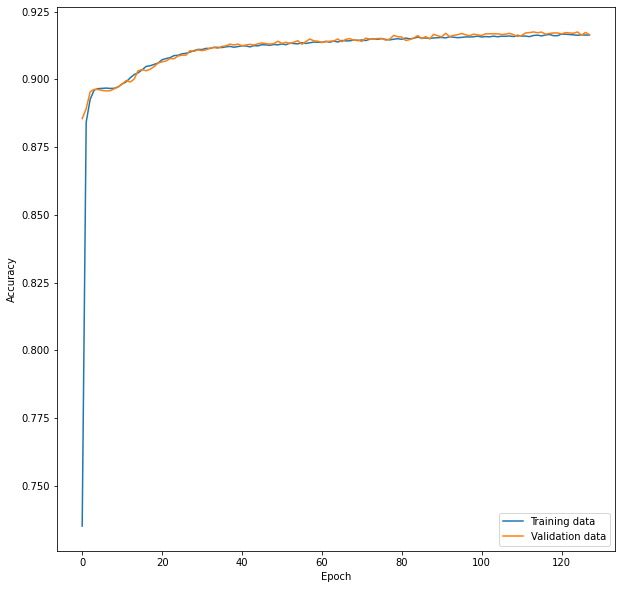

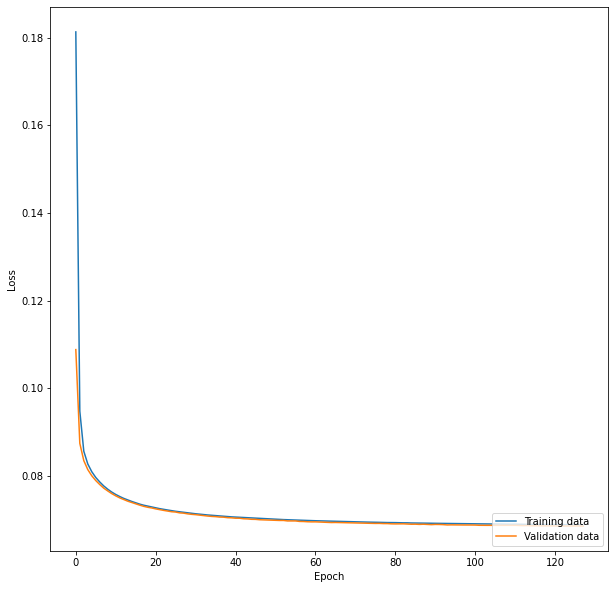

In [ ]:
# Logistic - Single-Layer
plt.plot(logBasicHist.history['acc'])
plt.plot(logBasicHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(logBasicHist.history['loss'])
plt.plot(logBasicHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

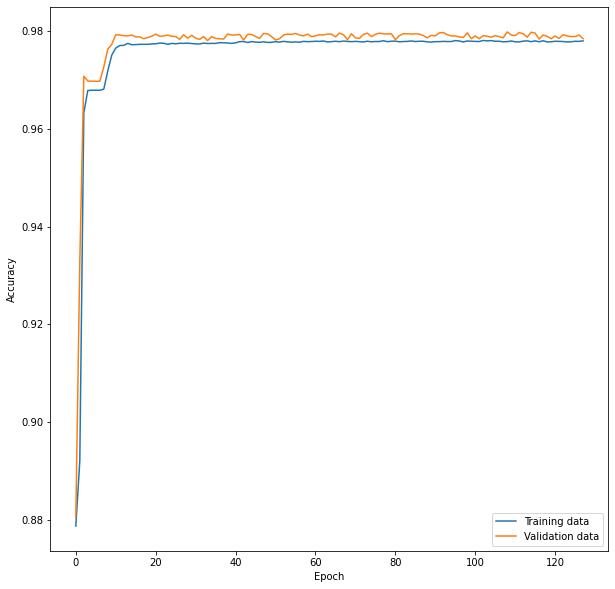

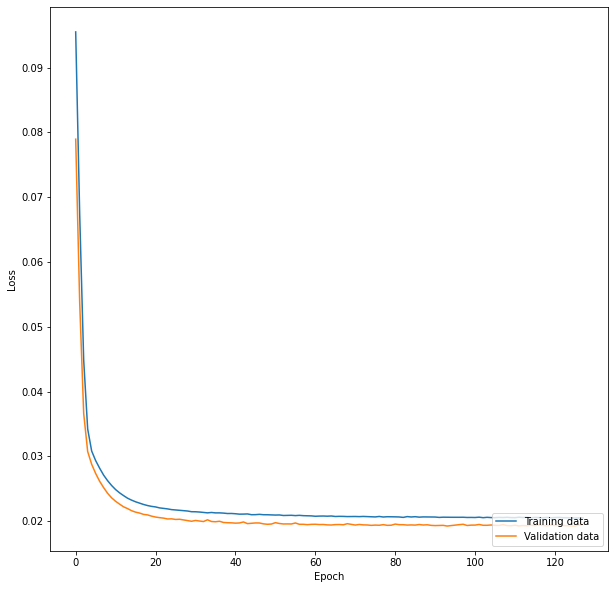

In [ ]:
# Logistic/Relu - Double-Layer
plt.plot(logRelDuoHist.history['acc'])
plt.plot(logRelDuoHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(logRelDuoHist.history['loss'])
plt.plot(logRelDuoHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

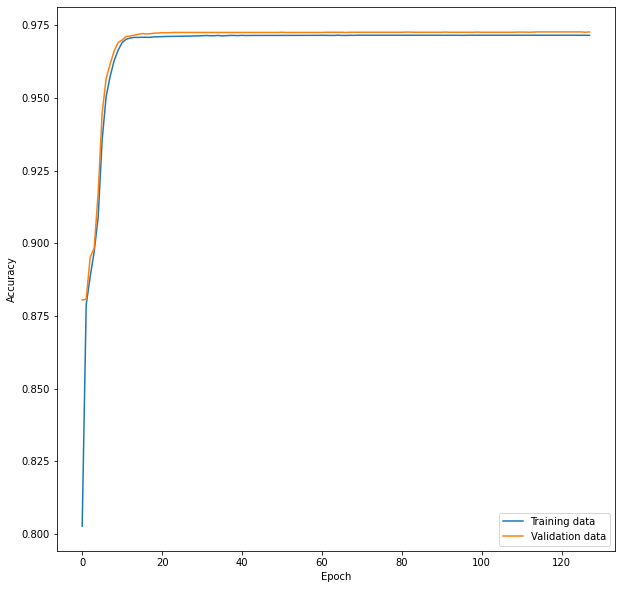

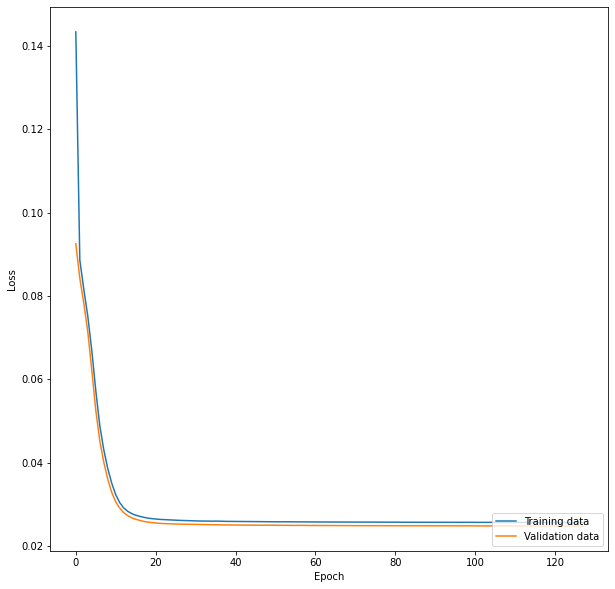

In [ ]:
# Logistic - Double-Layer
plt.plot(logDuoHist.history['acc'])
plt.plot(logDuoHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(logDuoHist.history['loss'])
plt.plot(logDuoHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

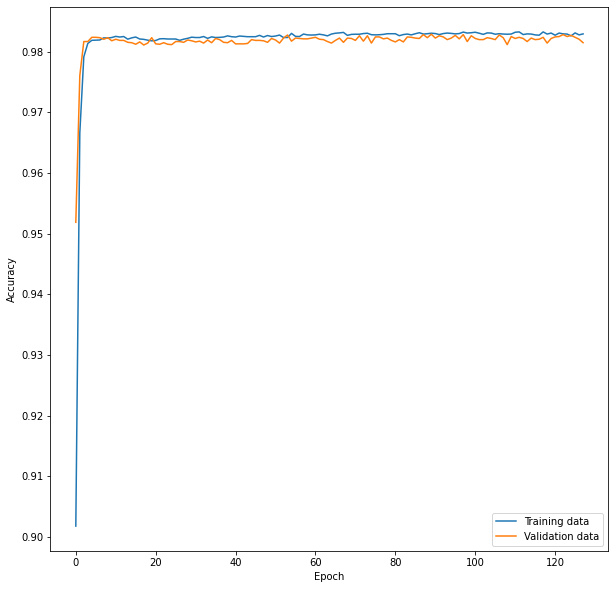

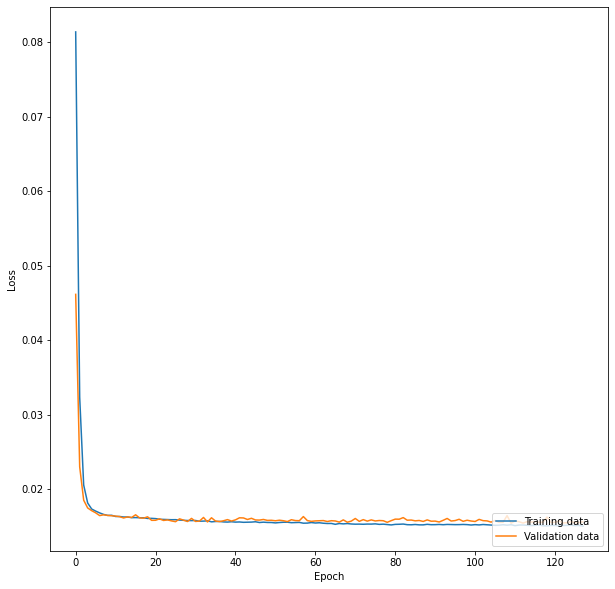

In [ ]:
# Logistic/Relu - Triple-Layer
plt.plot(logRelTrioHist.history['acc'])
plt.plot(logRelTrioHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(logRelTrioHist.history['loss'])
plt.plot(logRelTrioHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

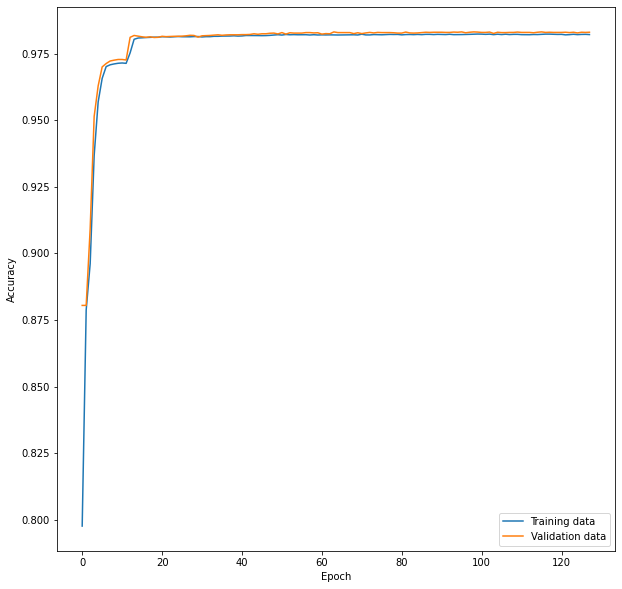

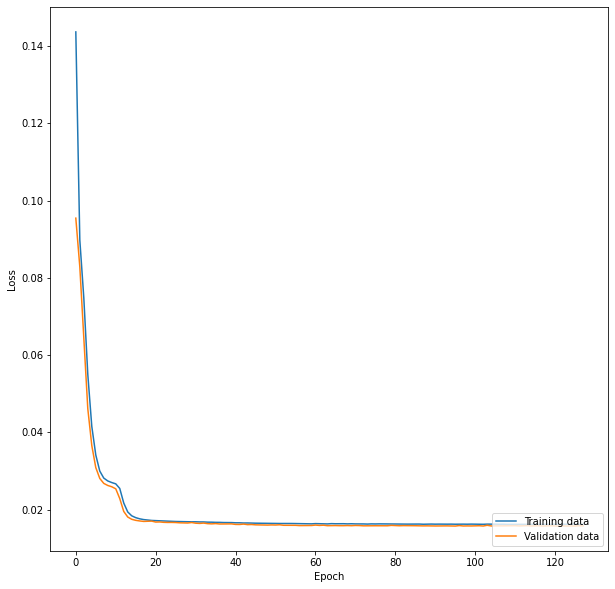

In [ ]:
# Logistic - Triple-Layer
plt.plot(logTrioHist.history['acc'])
plt.plot(logTrioHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(logTrioHist.history['loss'])
plt.plot(logTrioHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

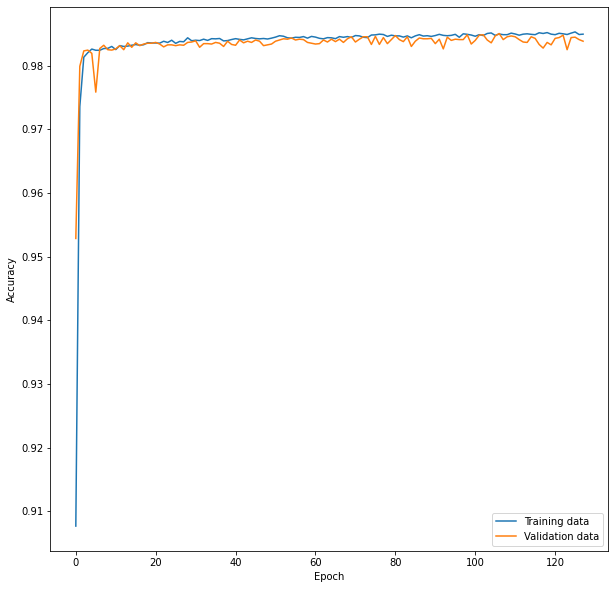

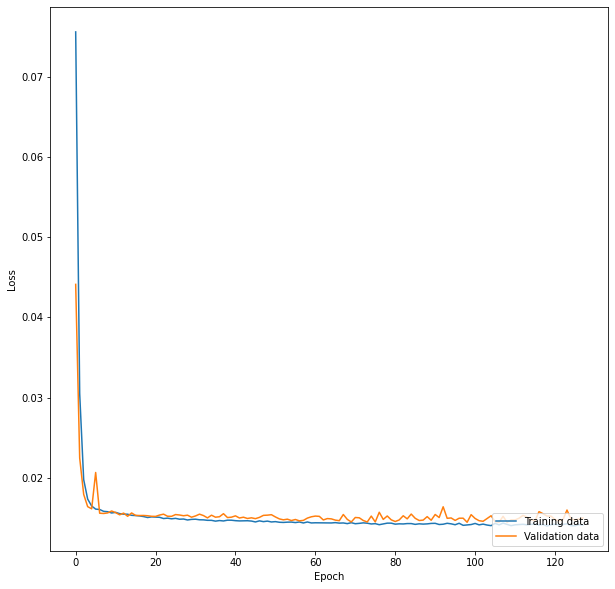

In [ ]:
# Logistic/Relu - Quadruple-Layer
plt.plot(logRelQuadHist.history['acc'])
plt.plot(logRelQuadHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(logRelQuadHist.history['loss'])
plt.plot(logRelQuadHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

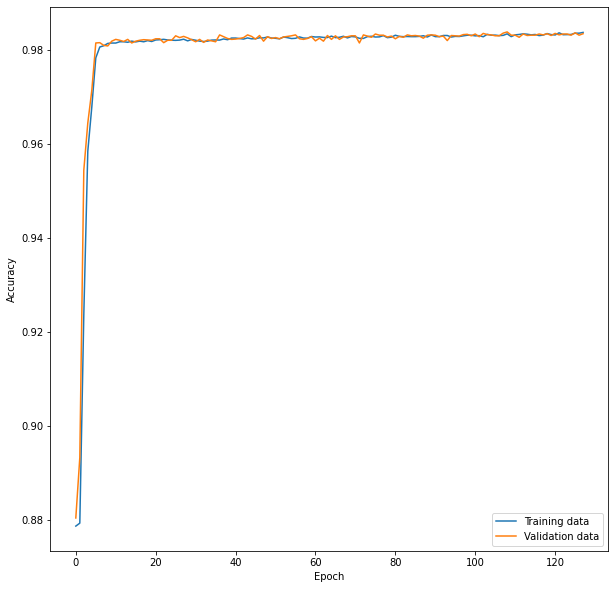

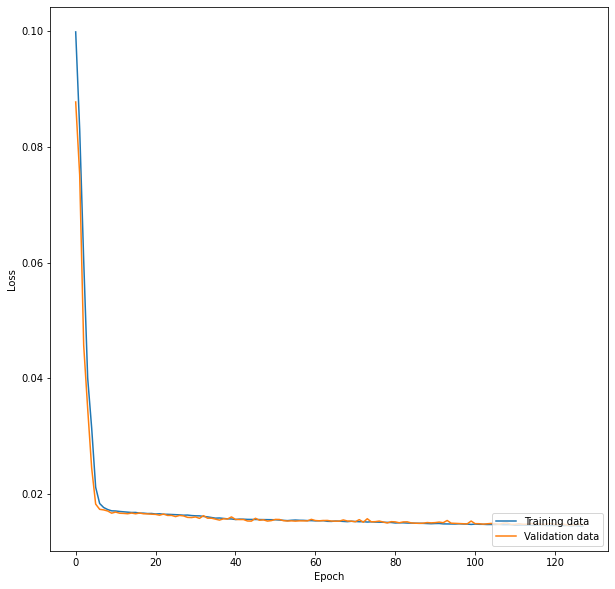

In [ ]:
# Logistic - Quadruple-Layer
plt.plot(logQuadHist.history['acc'])
plt.plot(logQuadHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(logQuadHist.history['loss'])
plt.plot(logQuadHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

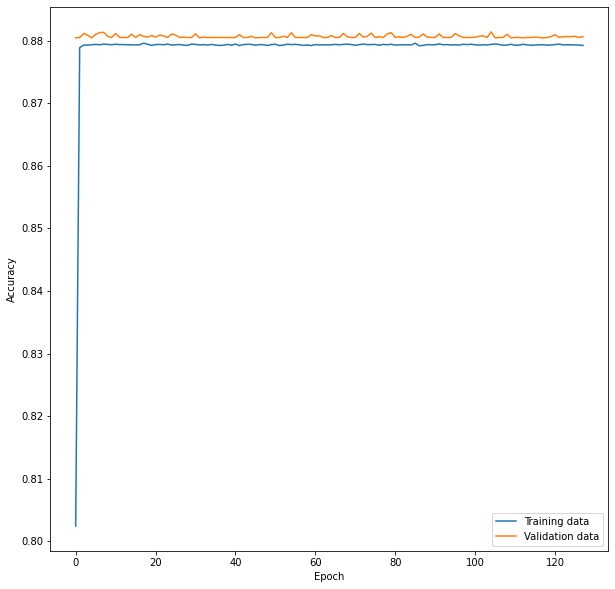

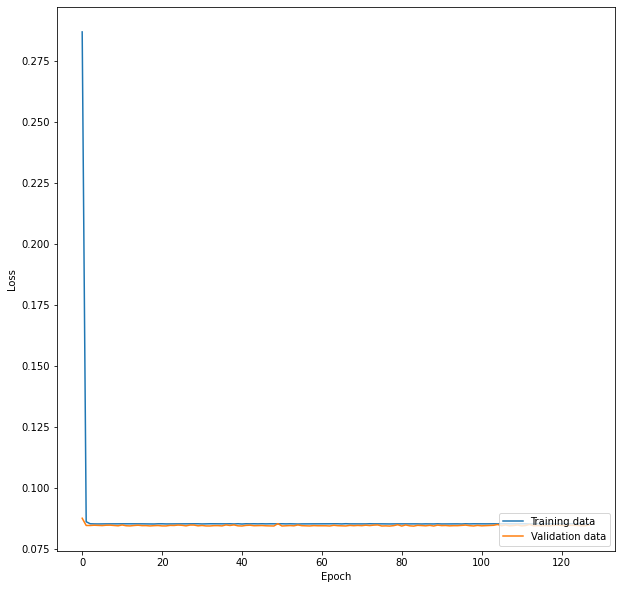

In [ ]:
# Linear - Single-Layer
plt.plot(linBasicHist.history['acc'])
plt.plot(linBasicHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(linBasicHist.history['loss'])
plt.plot(linBasicHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

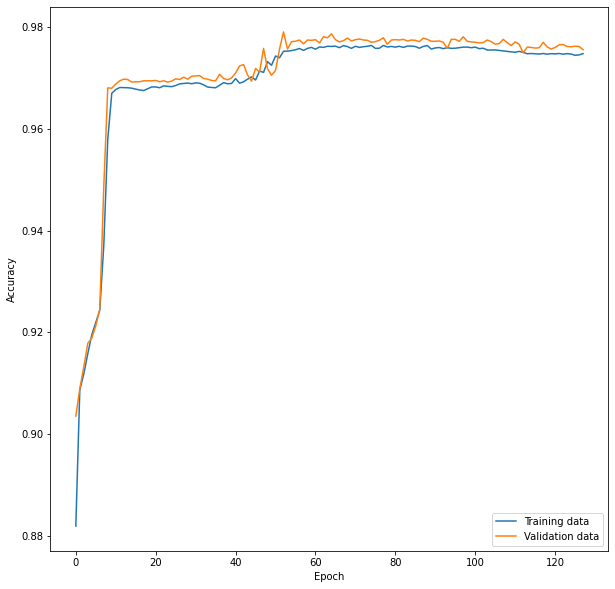

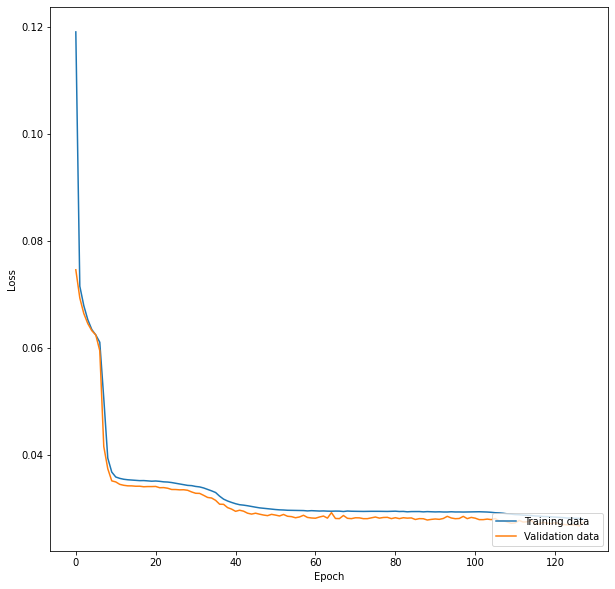

In [ ]:
# Linear/Relu - Double-Layer
plt.plot(linRelDuoHist.history['acc'])
plt.plot(linRelDuoHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(linRelDuoHist.history['loss'])
plt.plot(linRelDuoHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

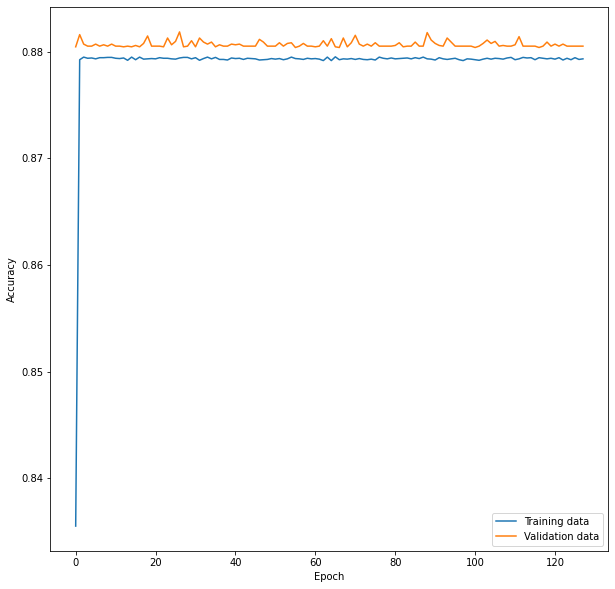

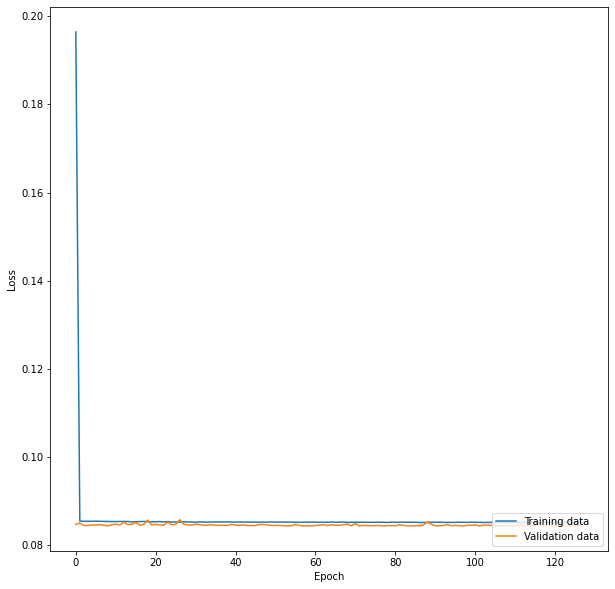

In [ ]:
# Linear - Double-Layer
plt.plot(linDuoHist.history['acc'])
plt.plot(linDuoHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(linDuoHist.history['loss'])
plt.plot(linDuoHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

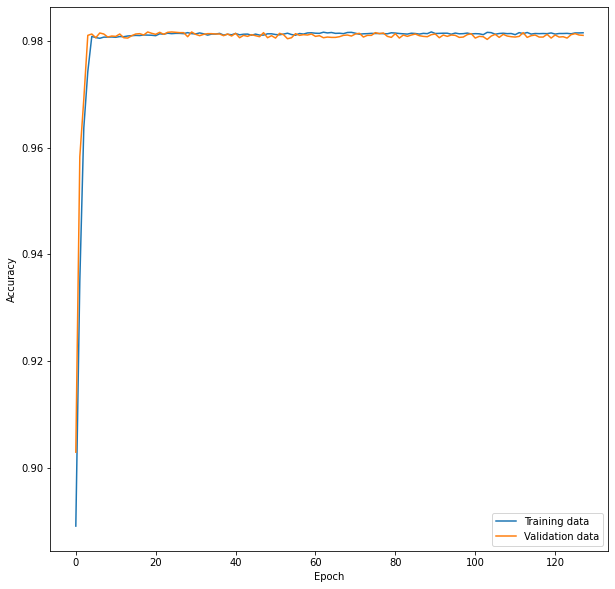

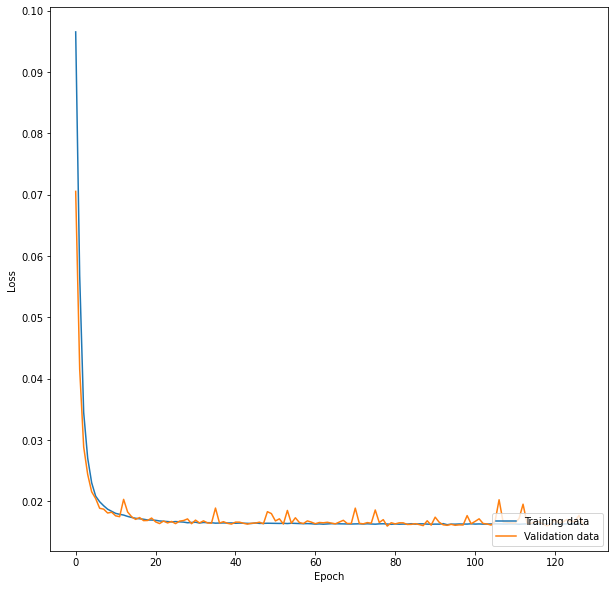

In [ ]:
# Linear/Relu - Triple-Layer
plt.plot(linRelTrioHist.history['acc'])
plt.plot(linRelTrioHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(linRelTrioHist.history['loss'])
plt.plot(linRelTrioHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

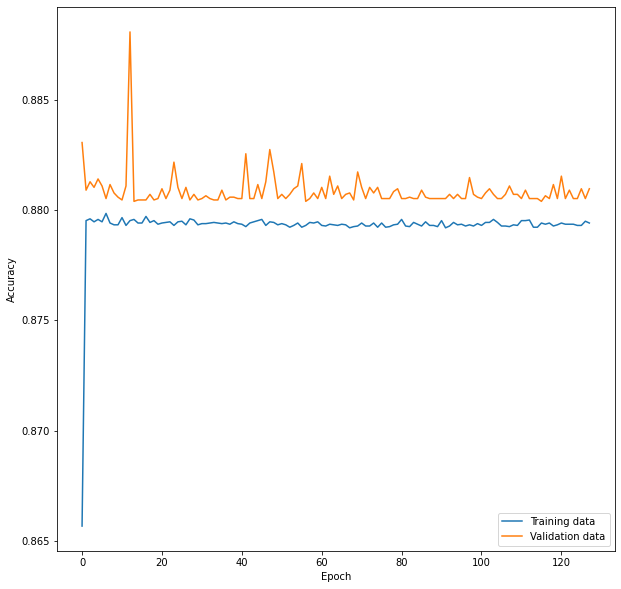

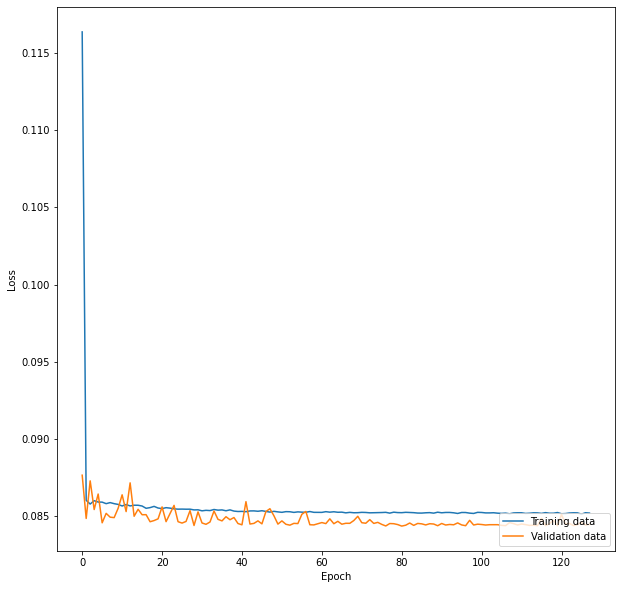

In [ ]:
# Linear - Triple-Layer
plt.plot(linTrioHist.history['acc'])
plt.plot(linTrioHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(linTrioHist.history['loss'])
plt.plot(linTrioHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

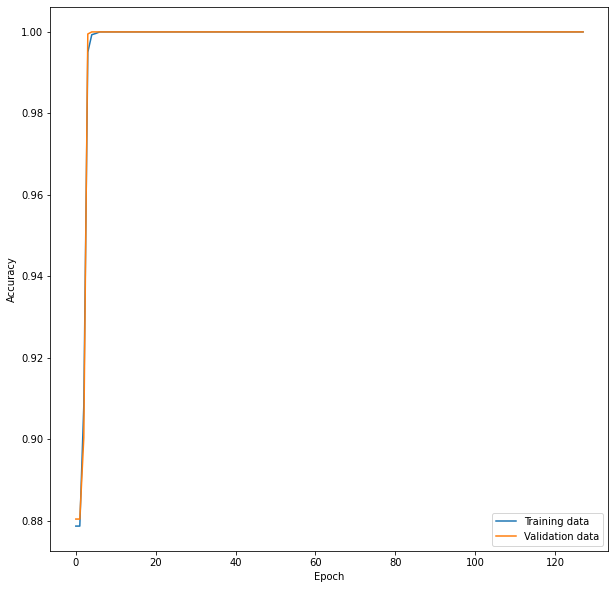

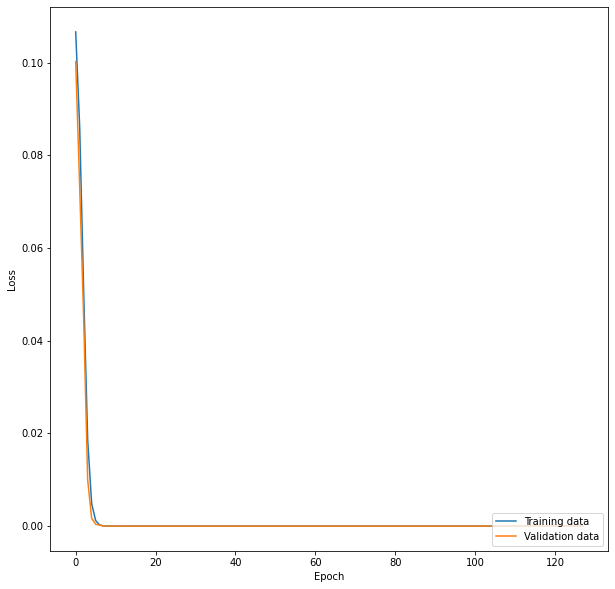

In [ ]:
# Output Inclusion
plt.plot(outInclHist.history['acc'])
plt.plot(outInclHist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()
plt.plot(outInclHist.history['loss'])
plt.plot(outInclHist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

##Extracurricular Code

###Verify Normalization

In [ ]:
# Create new dataframe
normalizedData = pd.DataFrame(data = Input,
                              columns = columnNames[0:-1])
revertedData = pd.DataFrame(data = undoNormalize(Input),
                            columns = columnNames[0:-1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6a8c4dc18>]],
      dtype=object)

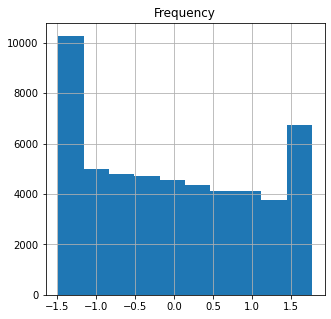

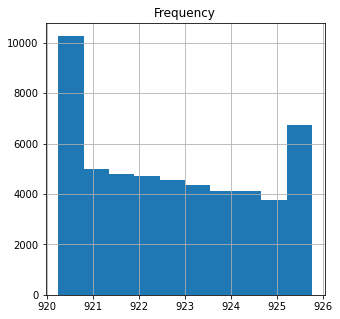

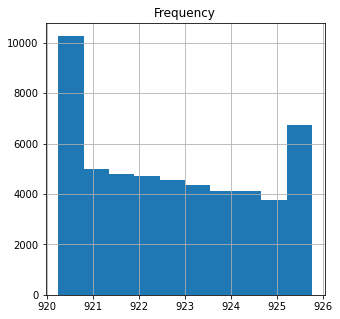

In [ ]:
# Get histograms of input columns from numpy array that has been normalized
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = ((5,5))

# Normalized
normalizedData.hist(column='Frequency')
# Reverted
revertedData.hist(column='Frequency')
# Original
datasetFrame.hist(column='Frequency')